In [1]:
import numpy as np
import pylab as pl
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score,rand_score
from sklearn.mixture import GaussianMixture as GMM
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
sns.set()
%matplotlib inline

# 1- Datasets

In [3]:
# Loading datasets 
temp = np.load("temper.npz") # we name it temp for temperature
digits = np.load("digits.npz") # we let the name digits for this dataset 

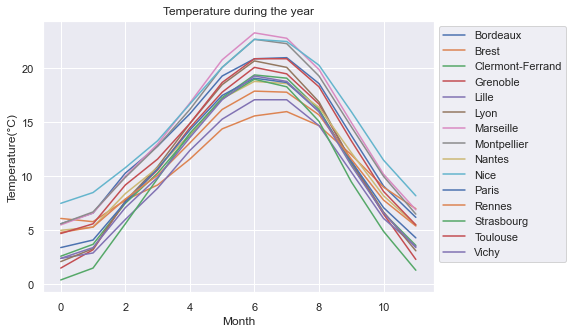

In [28]:
# Plot of temperature dataset
plt.figure(figsize = (7,5))
plt.plot(temp["data"][:,:-2].T)
plt.legend(temp['villes'],bbox_to_anchor=(1, 1))
plt.title("Temperature during the year")
plt.xlabel("Month")
plt.ylabel("Temperature(°C)")
plt.show()

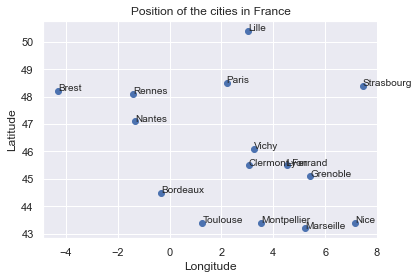

In [5]:
fig, ax = plt.subplots()
ax.scatter(temp["data"][:,-1],temp["data"][:,-2:-1])
ax.title.set_text("Position of the cities in France")
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
for i, txt in enumerate(temp["villes"]):
    ax.annotate(txt, ( temp["data"][:,-1][i],temp["data"][:,-2:-1][i]))

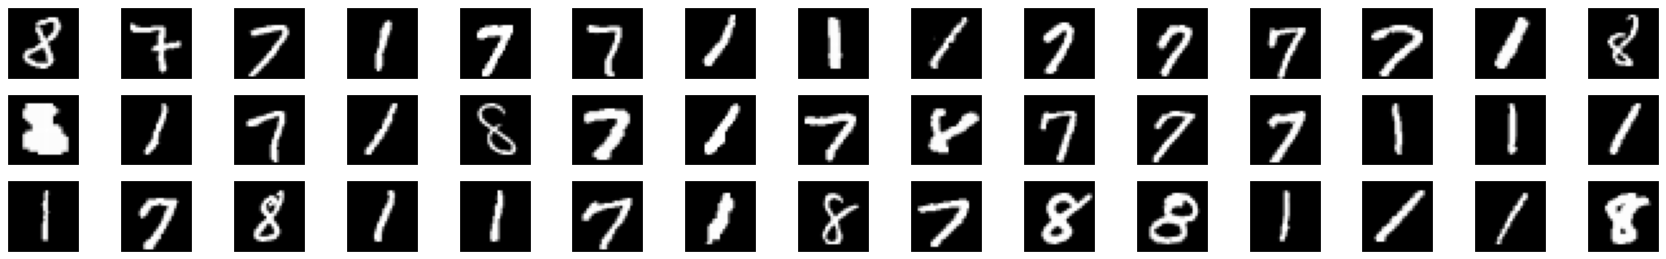

In [8]:
# We plot a random images in the dataset by using np.random.randint
num_row = 3 # number of rows used to plot the images 
num_col = 15 # plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(2*num_col,1.5*num_row))
for i in range(num_col*num_row):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(digits["x"][np.random.randint(1,3000)].reshape((28,28)), cmap='gray')
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.grid(False)
plt.show()

In [40]:
# Quick analysis of the datasets 
## temperature dataset
dicte_mean = dict(zip(temp["villes"],np.mean(temp["data"][:,:-2],axis = 1))) #The average temperature for every city 
dicte_std = dict(zip(temp["villes"],np.std(temp["data"][:,:-2],axis = 1))) # standard deviation
dicte_max = dict(zip(temp["villes"],np.max(temp["data"][:,:-2],axis = 1))) # max temperature
dicte_min = dict(zip(temp["villes"],np.min(temp["data"][:,:-2],axis = 1))) # min temperature 

## digits dataset 
unique, counts = np.unique(digits["y"], return_counts=True) # count th number of accurance of each number 
value_count = dict(zip(unique, counts))

print("mean temperature in every city:\n%s" %dicte_mean)
print("\n standard deviation temperature in every city:\n%s" %dicte_std)
print("\n max temperature in every city:\n%s" %dicte_max)
print("\n min temperature in every city:\n%s" %dicte_min)

mean temperature in every city:
{'Bordeaux': 13.33333333333333, 'Brest': 10.766666666666666, 'Clermont-Ferrand': 10.941666666666665, 'Grenoble': 10.983333333333334, 'Lille': 9.733333333333333, 'Lyon': 11.358333333333333, 'Marseille': 14.233333333333333, 'Montpellier': 13.891666666666667, 'Nantes': 11.691666666666668, 'Nice': 14.841666666666667, 'Paris': 11.183333333333335, 'Rennes': 11.133333333333335, 'Strasbourg': 9.716666666666667, 'Toulouse': 12.683333333333332, 'Vichy': 10.716666666666667}

 standard deviation temperature in every city:
{'Bordeaux': 5.546069679411618, 'Brest': 3.613016591283368, 'Clermont-Ferrand': 5.926277405664443, 'Grenoble': 6.482519229092618, 'Lille': 5.314341184212981, 'Lyon': 6.532541406085554, 'Marseille': 6.205015892181278, 'Montpellier': 5.981145143049299, 'Nantes': 5.030649118707799, 'Nice': 5.406394105336959, 'Paris': 5.626697274798265, 'Rennes': 4.747689496539928, 'Strasbourg': 6.636619788885168, 'Toulouse': 5.79911391698958, 'Vichy': 5.93714765036395

# 2- Clustring

## 2-1 Temperature clustring

In [65]:
# Kmeans on dataset temp with n_cluster = 3
kmeans_temp = KMeans(n_clusters=3, random_state=0).fit(temp["data"][:,:-2])

In [66]:
# labels of each city (predicted class)
labels_temp = kmeans_temp.labels_

In [67]:
# The cluster we got from the model 
clusters_temp = kmeans_temp.cluster_centers_

In [68]:
clusters_temp.shape

(3, 12)

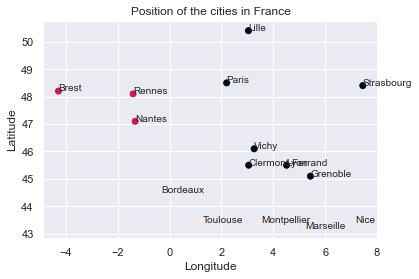

In [69]:
# plot of the cities by longitude and latitude and colored by class  
fig, ax = plt.subplots()
ax.scatter(temp["data"][:,-1],temp["data"][:,-2:-1],c = labels_temp, s=40, cmap='viridis', zorder=2)
ax.title.set_text("Position of the cities in France")
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

for i, txt in enumerate(temp["villes"]):
    ax.annotate(txt, ( temp["data"][:,-1][i],temp["data"][:,-2:-1][i]))

It seems that the cities are clustered by geographical position. The cities with less than 45 in latitude are in cluster. Those which have more than 45 in latitude are clustered by longitude. They are separated into two groups : those in non positive longitude and positive one. Also we can see the similarities between the clusters if we take n_clusters more bigger; of course it wouldn't make the model better, but just to see the similarities between the clusters  

## 2-1 Digits clustring 

In [70]:
# Dataset digits
kmeans_digits = KMeans(n_clusters=3, random_state=0).fit(digits["x"])

In [71]:
labels_digits = kmeans_digits.labels_

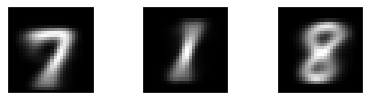

In [107]:
clusters_digits = kmeans_digits.cluster_centers_

# plot the clusters to see if they looks like a true image from the dataset 
num_row = 1
num_col = 3
fig, axes = plt.subplots(num_row, num_col, figsize=(2*num_col,1.5*num_row))
for i in range(num_row*num_col):
    ax = axes[i%num_col]
    ax.imshow(clusters_digits[i].reshape((28,28)), cmap='gray')
    #ax.set_title('Label: {}'.format(labels_digits[r]))
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.grid(False)
plt.tight_layout()
plt.show()

The clusters resemble a true image from the dataset. The clusters are an arrays of the same dimension as the true images, so it is an image.Also, it is close to some other images that they are from the same class digit. So if we take for example an n_cluster = 2, it may that the clusters and the true images wouldn't be alike. We can see for example the minimum distance between the clasters and the others members of the cluster. 

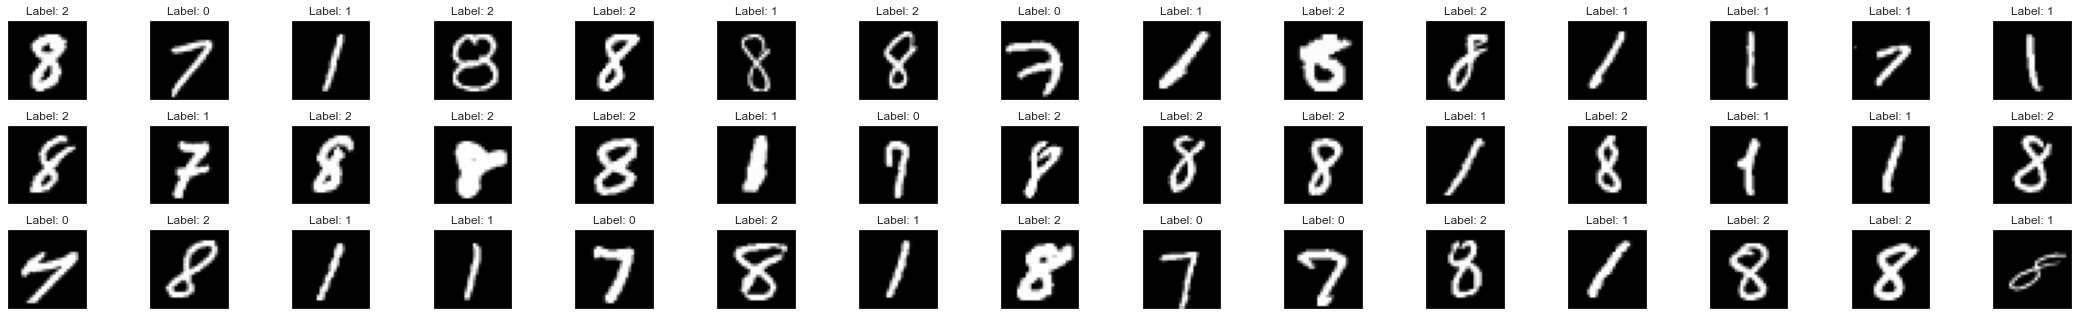

In [73]:
# We plot the images labeled by the models results 
num_row = 3 # number of rows used to plot the images 
num_col = 15 # plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(2*num_col,1.5*num_row))
for i in range(num_col*num_row):
    ax = axes[i//num_col, i%num_col]
    r = np.random.randint(3000)
    ax.imshow(digits["x"][r].reshape((28,28)), cmap='gray')
    ax.set_title('Label: {}'.format(labels_digits[r]))
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.grid(False)
plt.tight_layout()
plt.show()

we can see from the images that the clusters are made by digits. This means that each cluster contain one digits category.the class 0 is associated with digit 7, class 1 with 1 and class 2 with 8.

## 2-3 Temp clustring with n_cluster = 2

In [82]:
# Kmeans on dataset temp with n_cluster = 2
kmeans_temp1 = KMeans(n_clusters=2, random_state=0).fit(temp["data"][:,:-2])

In [75]:
labels_temp1 = kmeans_temp1.labels_

In [76]:
clusters_temp1 = kmeans_temp1.cluster_centers_

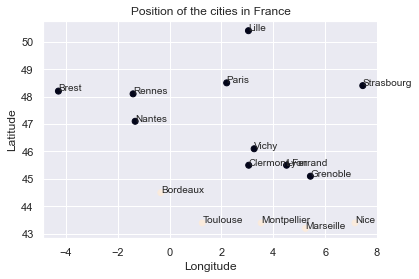

In [77]:
# plot of the cities by longitude and latitude and colored by class 
fig, ax = plt.subplots()
ax.scatter(temp["data"][:,-1],temp["data"][:,-2:-1],c = labels_temp1, s=40, cmap='viridis', zorder=2)
ax.title.set_text("Position of the cities in France")
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

for i, txt in enumerate(temp["villes"]):
    ax.annotate(txt, ( temp["data"][:,-1][i],temp["data"][:,-2:-1][i]))

## 2-3 Temp clustring with n_cluster = 4

In [78]:
# Kmeans on dataset temp with n_cluster = 4 
kmeans_temp2 = KMeans(n_clusters=4, random_state=0).fit(temp["data"][:,:-2])

In [79]:
labels_temp2 = kmeans_temp2.labels_

In [80]:
clusters_temp2 = kmeans_temp2.cluster_centers_

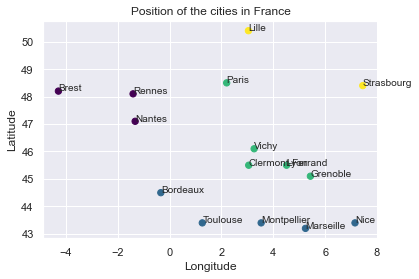

In [113]:
# plot of the cities by longitude and latitude and colored by class 
fig, ax = plt.subplots()
ax.scatter(temp["data"][:,-1],temp["data"][:,-2:-1],c = labels_temp2,s=40, cmap='viridis', zorder=2)
ax.title.set_text("Position of the cities in France")
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

for i, txt in enumerate(temp["villes"]):
    ax.annotate(txt, ( temp["data"][:,-1][i],temp["data"][:,-2:-1][i]))

For n_cluster = 4, we can find an interpretation based on the geographical position and the data summary we made in the first part, but it wouldn't be convenient. Althougth, for n_cluster = 3 it is more interpretable and clear to separate. Also for n_cluster = 2 the clusters are not separable. So we can get n_cluster our model from first intuition, but we should prove by test.  

## 2-3 Digits clustring with n_cluster = 2

In [85]:
# Kmeans on dataset digits with n_cluster = 2 
kmeans_digits1 = KMeans(n_clusters=2, random_state=0).fit(digits["x"])

In [86]:
labels_digits1 = kmeans_digits1.labels_

In [87]:
clusters_digits1 = kmeans_digits1.cluster_centers_

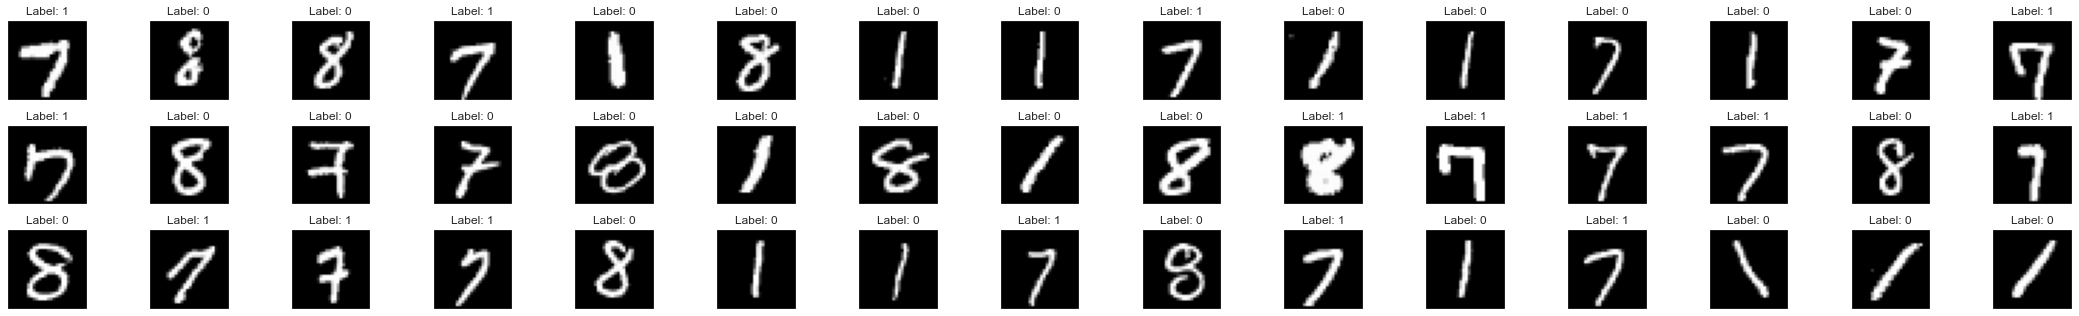

In [88]:
# We plot a random images in the dataset by using np.random.randint
num_row = 3 # number of rows used to plot the images 
num_col = 15 # plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(2*num_col,1.5*num_row))
for i in range(num_col*num_row):
    ax = axes[i//num_col, i%num_col]
    r = np.random.randint(3000)
    ax.imshow(digits["x"][r].reshape((28,28)), cmap='gray')
    ax.set_title('Label: {}'.format(labels_digits1[r]))
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.grid(False)
plt.tight_layout()
plt.show()

## 2-3 Digits clustring with n_cluster = 4

In [90]:
# Kmeans on dataset digits with n_cluster = 2 
kmeans_digits2 = KMeans(n_clusters=4, random_state=0).fit(digits["x"])

In [91]:
labels_digits2 = kmeans_digits2.labels_

In [92]:
clusters_digits2 = kmeans_digits2.cluster_centers_

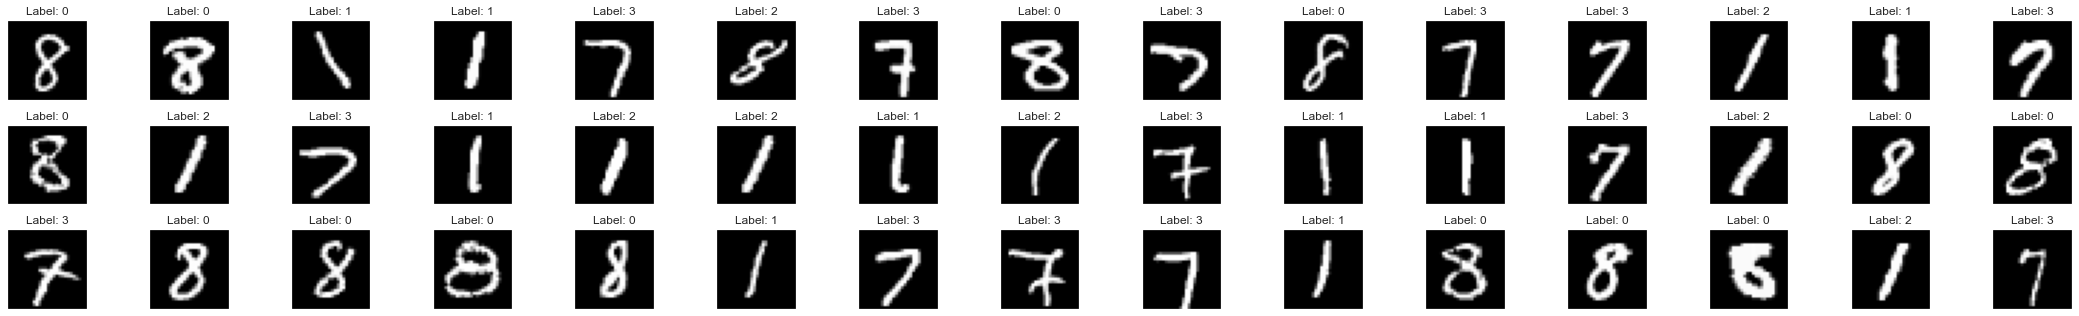

In [93]:
# We plot a random images in the dataset by using np.random.randint
num_row = 3 # number of rows used to plot the images 
num_col = 15 # plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(2*num_col,1.5*num_row))
for i in range(num_col*num_row):
    ax = axes[i//num_col, i%num_col]
    r = np.random.randint(3000)
    ax.imshow(digits["x"][r].reshape((28,28)), cmap='gray')
    ax.set_title('Label: {}'.format(labels_digits2[r]))
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.grid(False)
plt.tight_layout()
plt.show()

Actually, for the digits dataset it wouldn't be as difficult as the temperature one. First, beacause the model with n_cluster separte very well the classes by digits. Also, for n_cluster = 2,4 we can't interprete the results because we have one onlu creterion which is the digits classes (1,7,8) or use the 784 dimensions which is not something concret. But we can use the tests to see if our intuition is right or not.

## 2-3-3 The score (for digits dataset only)

In [94]:
# We change the predicted labels to be as the the real labels 
real = digits["y"][:].reshape((3000))
mapp = {2:1,3:7,2:8,0:8,1:1} 
predicted = [mapp[i] for i in labels_digits2]

# Rand score for  k=4
print("Rand score for  k=4: {}".format(rand_score(real,predicted)))

# Adj Rand score for  k=4
print("adjusted rand score for k=4 : {}".format(adjusted_rand_score(real,predicted)))

Rand score for  k=4: 0.7631181504946093
adjusted rand score for k=4 : 0.486154228959728


In [95]:
# We change the labels to be as the the real labels 
real = digits["y"][:].reshape((3000))
mapp = {0:1,1:7,2:8} 
predicted = [mapp[i] for i in labels_digits]

# Rand score for  k=3
print("Rand score for  k=3: {}".format(rand_score(real,predicted)))

# Adj Rand score for  k=3
print("adjusted rand score for k=3 : {}".format(adjusted_rand_score(real,predicted)))

Rand score for  k=3: 0.8815562965432923
adjusted rand score for k=3 : 0.7353304173178205


In [99]:
# We change the labels to be as the the real labels 
real = digits["y"][:].reshape((3000))
mapp = {0:1,1:7} 
predicted = [mapp[i] for i in labels_digits1]

# Rand score for  k=2
print("Rand score for  k=2: {}".format(rand_score(real,predicted)))

# Adj Rand score for  k=2
print("adjusted rand score for k=2 : {}".format(adjusted_rand_score(real,predicted)))

Rand score for  k=2: 0.6976861175947539
adjusted rand score for k=2 : 0.42155790084160727


As we see, the model with three clusters has the best score for the digits dataset.

# 3- Density estimation

In [115]:
# GMM models for both datasets 
model_temp = GMM(2,covariance_type='diag').fit(temp["data"][:,:-2])
model_digits = GMM(3,covariance_type='diag').fit(digits["x"])

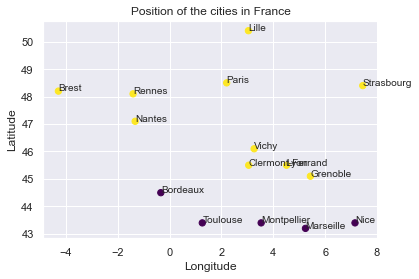

In [116]:
# Plot of the GMM result for K = 2 on temp dataset 
ax = plt.gca()
labels_gmm_temp = model_temp.predict(temp["data"][:,:-2])
ax.scatter(temp["data"][:,-1],temp["data"][:,-2:-1], c=labels_gmm_temp, s=40, cmap='viridis', zorder=2)
ax.title.set_text("Position of the cities in France")
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

for i, txt in enumerate(temp["villes"]):
    ax.annotate(txt, ( temp["data"][:,-1][i],temp["data"][:,-2:-1][i]))
    

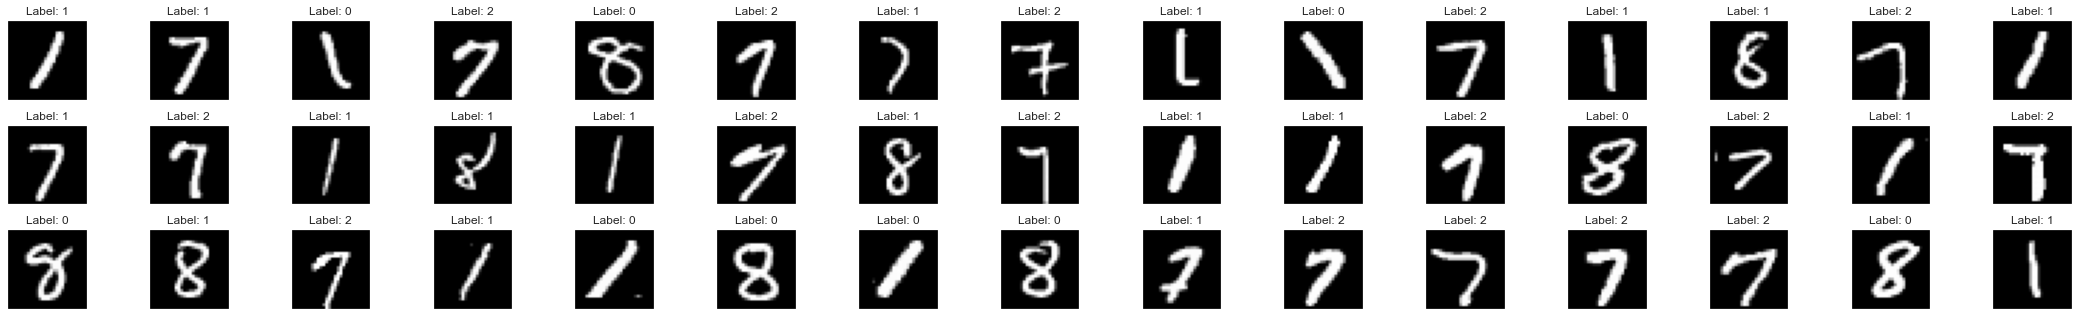

In [118]:
# We plot a random images form the results of GMM model on digits dataset using np.random.randint
num_row = 3 # number of rows used to plot the images 
num_col = 15 # plot images
labels_gmm_digits = model_digits.predict(digits["x"])
fig, axes = plt.subplots(num_row, num_col, figsize=(2*num_col,1.5*num_row))
for i in range(num_col*num_row):
    ax = axes[i//num_col, i%num_col]
    r = np.random.randint(3000)
    ax.imshow(digits["x"][r].reshape((28,28)), cmap='gray')
    ax.set_title('Label: {}'.format(labels_gmm_digits[r]))
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.grid(False)
plt.tight_layout()
plt.show()

## GMM with parameter 3, 4

In [119]:
model_temp1 = GMM(3,covariance_type='diag').fit(temp["data"][:,:-2])
model_digits1 = GMM(4,covariance_type='diag').fit(digits["x"])

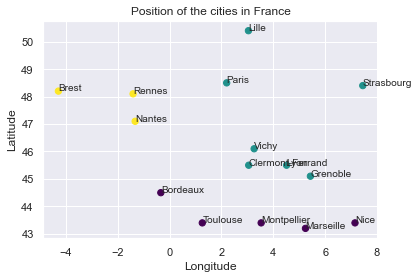

In [121]:
ax = plt.gca()
labels_gmm_temp1 = model_temp1.predict(temp["data"][:,:-2])
ax.scatter(temp["data"][:,-1],temp["data"][:,-2:-1], c=labels_gmm_temp1, s=40, cmap='viridis', zorder=2)
ax.title.set_text("Position of the cities in France")
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

for i, txt in enumerate(temp["villes"]):
    ax.annotate(txt, ( temp["data"][:,-1][i],temp["data"][:,-2:-1][i]))
    

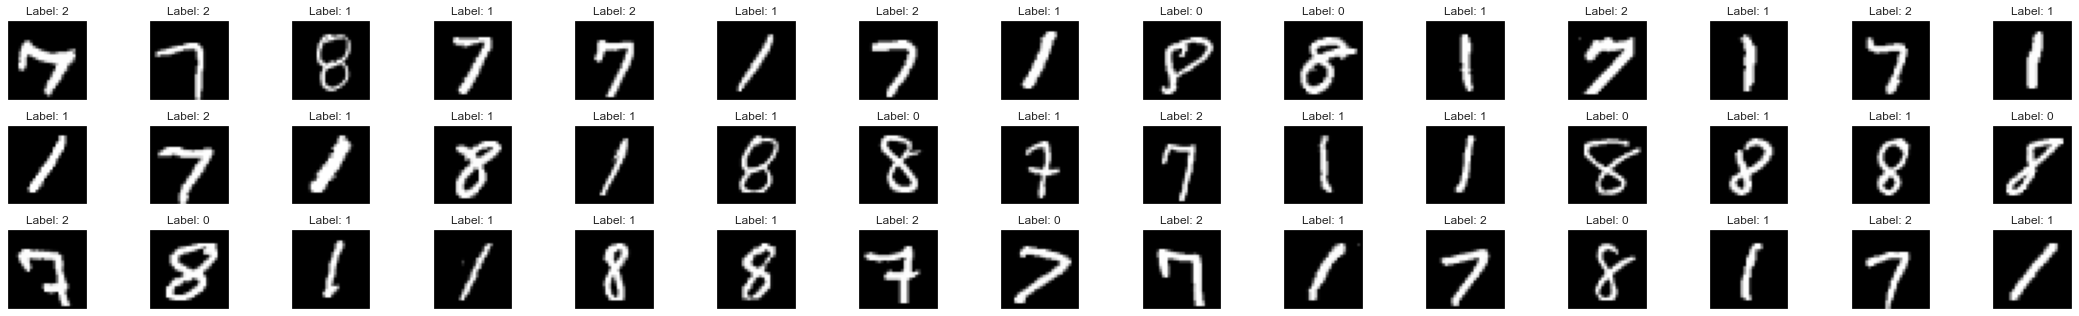

In [122]:
# We plot a random images form the results of GMM model on digits dataset using np.random.randint
num_row = 3 # number of rows used to plot the images 
num_col = 15 # plot images
labels_gmm_digits1 = model_digits1.predict(digits["x"])
fig, axes = plt.subplots(num_row, num_col, figsize=(2*num_col,1.5*num_row))
for i in range(num_col*num_row):
    ax = axes[i//num_col, i%num_col]
    r = np.random.randint(3000)
    ax.imshow(digits["x"][r].reshape((28,28)), cmap='gray')
    ax.set_title('Label: {}'.format(labels_gmm_digits1[r]))
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.grid(False)
plt.tight_layout()
plt.show()

## GMM with parameter 2, 3

In [126]:
model_temp2 = GMM(2,covariance_type='diag').fit(temp["data"][:,:-2])
model_digits2 = GMM(3,covariance_type='diag').fit(digits["x"])

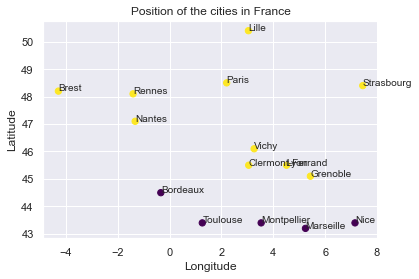

In [135]:
ax = plt.gca()
labels_gmm_temp2 = model_temp2.predict(temp["data"][:,:-2])
ax.scatter(temp["data"][:,-1],temp["data"][:,-2:-1], c=labels_gmm_temp2, s=40, cmap='viridis', zorder=2)
ax.title.set_text("Position of the cities in France")
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

for i, txt in enumerate(temp["villes"]):
    ax.annotate(txt, ( temp["data"][:,-1][i],temp["data"][:,-2:-1][i]))
    

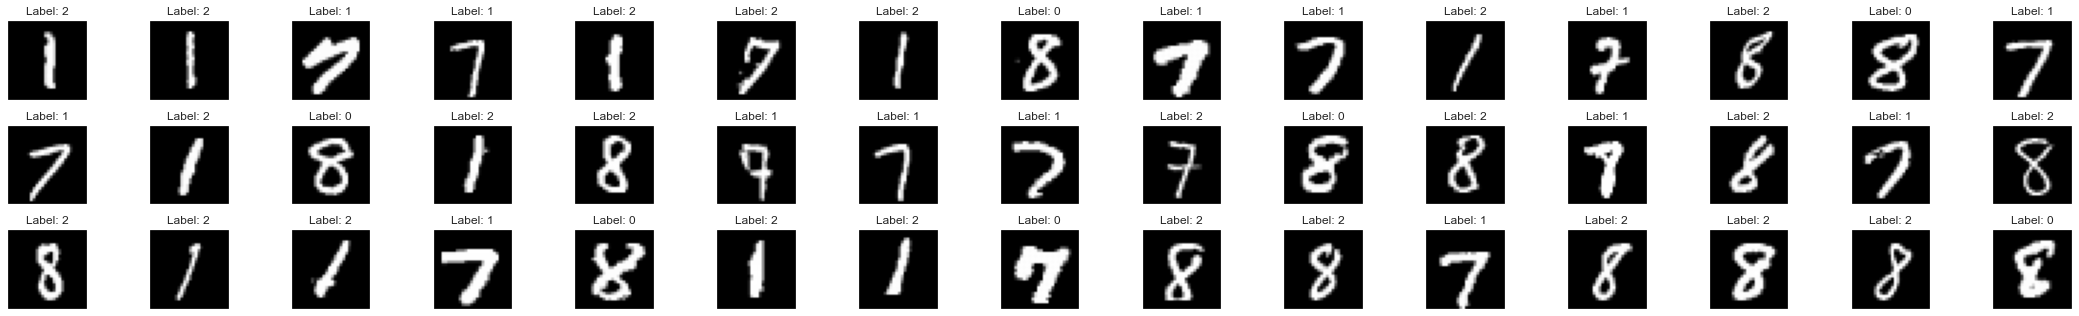

In [128]:
# We plot a random images form the results of GMM model on digits dataset using np.random.randint
num_row = 3 # number of rows used to plot the images 
num_col = 15 # plot images
labels_gmm_digits2 = model_digits2.predict(digits["x"])
fig, axes = plt.subplots(num_row, num_col, figsize=(2*num_col,1.5*num_row))
for i in range(num_col*num_row):
    ax = axes[i//num_col, i%num_col]
    r = np.random.randint(3000)
    ax.imshow(digits["x"][r].reshape((28,28)), cmap='gray')
    ax.set_title('Label: {}'.format(labels_gmm_digits2[r]))
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.grid(False)
plt.tight_layout()
plt.show()

From all the GMM models that we creates we give a guess about which model is the best. For the temp dataset the GMM model gives the same results as k means and so we choose the GMM with the paramter 3 which may clearly separate the dataset. For the digits also we keep the choice of the GMM model with parameter 3.

## GMM with parameter 2, 3 with covariance_type='full'

In [140]:
model_temp3 = GMM(2,covariance_type='full').fit(temp["data"][:,:-2])
model_digits3 = GMM(3,covariance_type='full').fit(digits["x"])

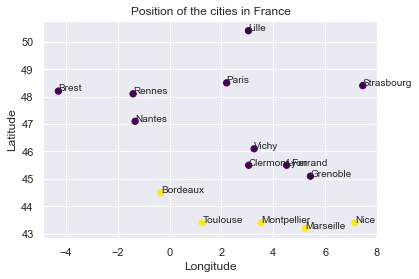

In [141]:
ax = plt.gca()
labels_gmm_temp3 = model_temp3.predict(temp["data"][:,:-2])
ax.scatter(temp["data"][:,-1],temp["data"][:,-2:-1], c=labels_gmm_temp3, s=40, cmap='viridis', zorder=2)
ax.title.set_text("Position of the cities in France")
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

for i, txt in enumerate(temp["villes"]):
    ax.annotate(txt, ( temp["data"][:,-1][i],temp["data"][:,-2:-1][i]))
    

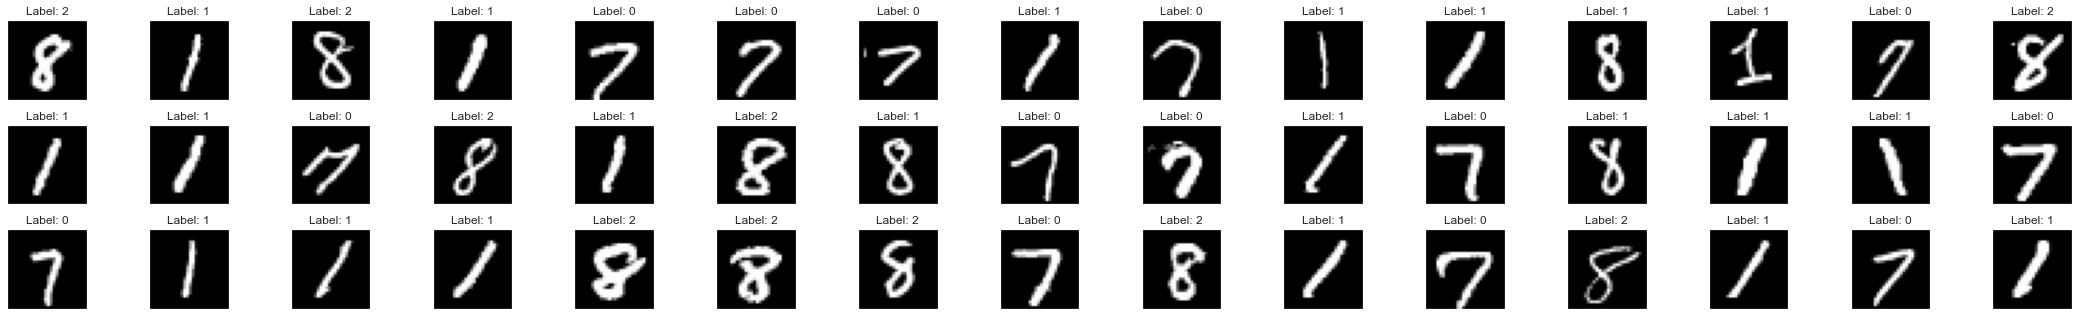

In [142]:
# We plot a random images form the results of GMM model on digits dataset using np.random.randint
num_row = 3 # number of rows used to plot the images 
num_col = 15 # plot images
labels_gmm_digits3 = model_digits3.predict(digits["x"])
fig, axes = plt.subplots(num_row, num_col, figsize=(2*num_col,1.5*num_row))
for i in range(num_col*num_row):
    ax = axes[i//num_col, i%num_col]
    r = np.random.randint(3000)
    ax.imshow(digits["x"][r].reshape((28,28)), cmap='gray')
    ax.set_title('Label: {}'.format(labels_gmm_digits3[r]))
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.grid(False)
plt.tight_layout()
plt.show()

In [133]:
logprob = list(model_temp2.score_samples(temp["data"][:,:-2]))
sort_logprob = sorted(logprob)
# we plot the n_first samples
n_samples = 5
samples = sort_logprob[:n_samples]
print("The {} samples with lowest probability : {}".format(n_samples,samples))

The 5 samples with lowest probability : [-30.66152561843062, -23.880568664860608, -21.4907882843647, -20.62541895463396, -20.24013377378087]


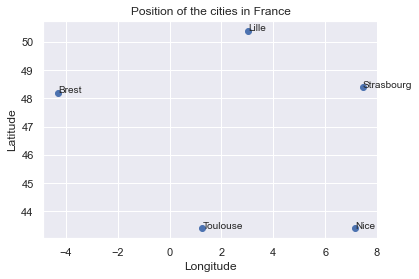

In [192]:
fig, ax = plt.subplots()
index = np.array([logprob.index(sample) for sample in samples])
ax.scatter(temp["data"][index,-1],temp["data"][index,-2:-1])
ax.title.set_text("Position of the cities in France")
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

for i, txt in enumerate(temp["villes"][index]):
    ax.annotate(txt, ( temp["data"][index,-1][i],temp["data"][index,-2:-1][i]))

Actually, these cities are the most far from the other ones (in longitude and latitude), and as we see, there is a similarities between the model clusters and position, so it is logical that we consider these as outliers.

### Digits dataset

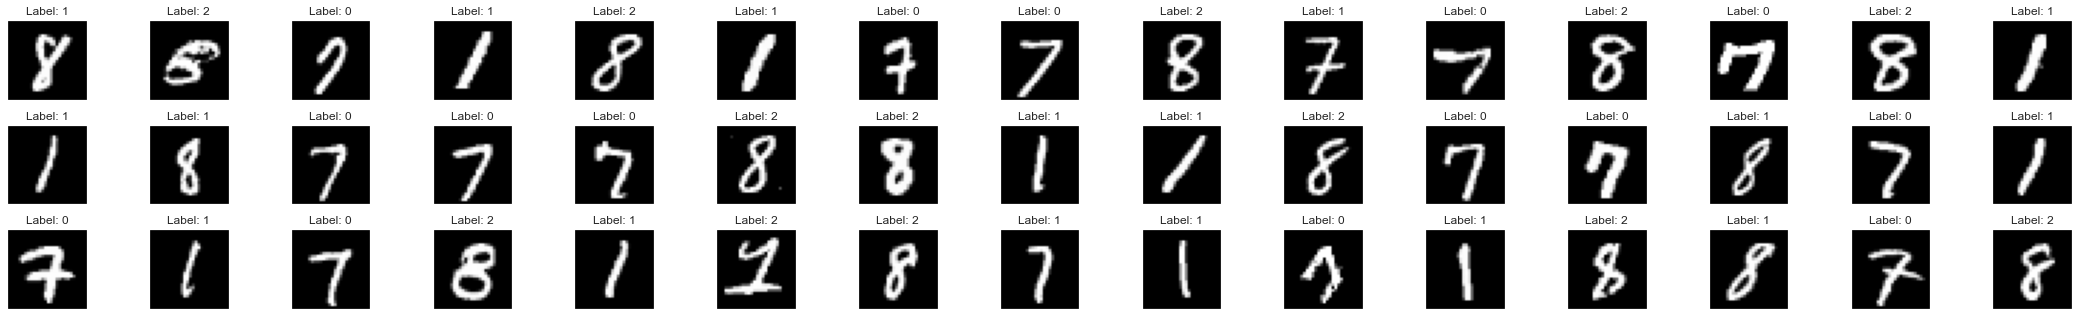

In [144]:
# We plot a random images in the dataset by using np.random.randint
num_row = 3 # number of rows used to plot the images 
num_col = 15 # plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(2*num_col,1.5*num_row))
for i in range(num_col*num_row):
    ax = axes[i//num_col, i%num_col]
    r = np.random.randint(3000)
    ax.imshow(digits["x"][r].reshape((28,28)), cmap='gray')
    ax.set_title('Label: {}'.format(labels_gmm_digits3[r]))
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.grid(False)
plt.tight_layout()
plt.show()

In [145]:
# We change the labels to be as the the real labels 
real = digits["y"][:].reshape((3000))
mapp = {0:1,1:7,2:8} 
predicted = [mapp[i] for i in labels_gmm_digits3]

# Rand score for  k=3
print("Rand score for  k=3: {}".format(rand_score(real,predicted)))

# Adj Rand score for  k=3
print("adjusted rand score for k=3 : {}".format(adjusted_rand_score(real,predicted)))

Rand score for  k=3: 0.8643303323329999
adjusted rand score for k=3 : 0.6977312788508411


In [149]:
## Generate new samples
new_sample = model_digits3.sample(1000)

In [150]:
new_sample[0].shape

(1000, 784)

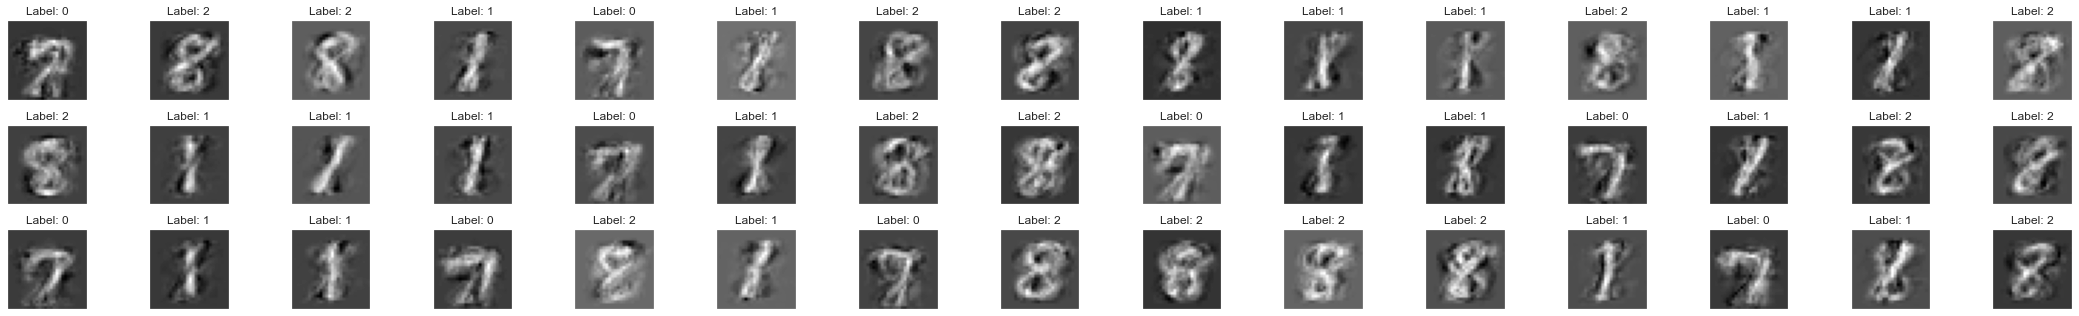

In [151]:
# We plot a random images in the dataset by using np.random.randint
num_row = 3 # number of rows used to plot the images 
num_col = 15 # plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(2*num_col,1.5*num_row))
for i in range(num_col*num_row):
    ax = axes[i//num_col, i%num_col]
    r = np.random.randint(1000)
    ax.imshow(new_sample[0][r].reshape((28,28)), cmap='gray')
    ax.set_title('Label: {}'.format(new_sample[1][r]))
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.grid(False)
plt.tight_layout()
plt.show()

We can see that the images generated are a digits but they are not as clear as the real ones. However, they still a good representattion of the data, and they could be used in prediction models to make the data larger. 

# 4 Dimensionality reduction

## 4.1 Linear Projection : Principal Component Analysis

In [152]:
# Covariance matrix
cov_digits = np.cov(digits["x"].T)
cov_temp = np.cov(temp["data"][:,:-2].T)

In [153]:
# PCA for both datasets
pca_temp = PCA().fit(temp["data"][:,:-2])
pca_digits = PCA().fit(digits["x"])

# explained ration for both datasets with n_components = None
explained_ratio_temp = pca_temp.explained_variance_ratio_
explained_ratio_digits = pca_digits.explained_variance_ratio_

In [168]:
# explained ratios for the months of the year, which present the variance in each direction
explained_ratio_temp

array([7.83110305e-01, 2.06569899e-01, 4.84535068e-03, 2.79489336e-03,
       1.14488366e-03, 6.57394899e-04, 5.57874105e-04, 1.40975158e-04,
       1.10823960e-04, 4.29735573e-05, 2.29442453e-05, 1.68278390e-06])

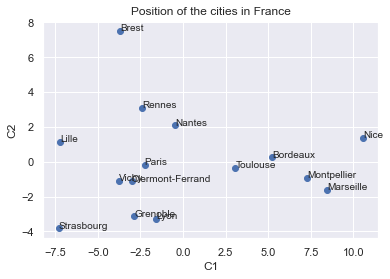

In [190]:
# The projection of the temp dataset on the two fist dimension in the explained variance ratio
fig, ax = plt.subplots()
transform_temp = PCA(n_components = 2).fit_transform(temp["data"][:,:-2])
ax.scatter(transform_temp[:,0], transform_temp[:,1])
ax.title.set_text("Position of the cities in France")
ax.set_xlabel('C1')
ax.set_ylabel('C2')

for i, txt in enumerate(temp["villes"]):
    ax.annotate(txt, (transform_temp[i,0], transform_temp[i,1]))

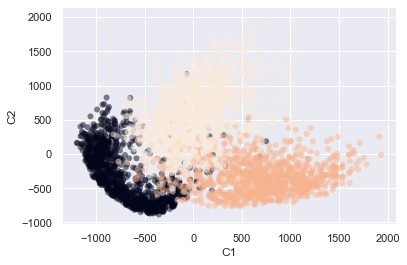

In [191]:
# The projection of the digits dataset on the two fist dimension in the explained variance ratio
transform_digits = PCA(n_components = 2).fit_transform(digits["x"])
plt.scatter(transform_digits[:,0], transform_digits[:,1], c = digits["y"],edgecolor='none', alpha=0.5)
plt.xlabel("C1")
plt.ylabel("C2")
plt.show()

4-1-2 When projecting on the space of 2 dimensions we preserved more than 98% of the variance for the temp dataset but just 30% for the digits one, because the first dataset is a very low dimension compared to digits dataset. In this case high dimension makes a lot of difference in projections.

4-1-3 For the temp dataset we preserved a lot of variance, so we can see that there is a correlation to what we have seen. For example Toulous, Bordeaux, Montpeliers... are very close as in the real map. It is the same for the other cities. However we lost a lot of variance in the digit dataset and we can't see a clear relationship between the projection and real data. 

In [180]:
# The first 2 components of each models 
model1 = PCA(2)
model2 = PCA(3)
model3 = PCA(10)

# The transformation made by each model on the temp dataset
trans_temp1 = model1.fit_transform(temp["data"][:,:-2])
trans_temp2 = model2.fit_transform(temp["data"][:,:-2])
trans_temp3 = model3.fit_transform(temp["data"][:,:-2])

# The transformation made by each model on the digits dataset
trans_digits1 = model1.fit_transform(digits["x"])
trans_digits2 = model2.fit_transform(digits["x"])
trans_digits3 = model3.fit_transform(digits["x"])

In [181]:
# The inverse transformation made by each model on the temp dataset
trans_inv_temp1 = model1.inverse_transform(trans_temp1)
trans_inv_temp2 = model2.inverse_transform(trans_temp2)
trans_inv_temp3 = model3.inverse_transform(trans_temp3)

# The inverse transformation made by each model on the digits dataset
trans_inv_digits1 = model1.inverse_transform(trans_digits1)
trans_inv_digits2 = model2.inverse_transform(trans_digits2)
trans_inv_digits3 = model3.inverse_transform(trans_digits3)

the inverse transformation and the real images respectively : p = 2 p = 10 and real data


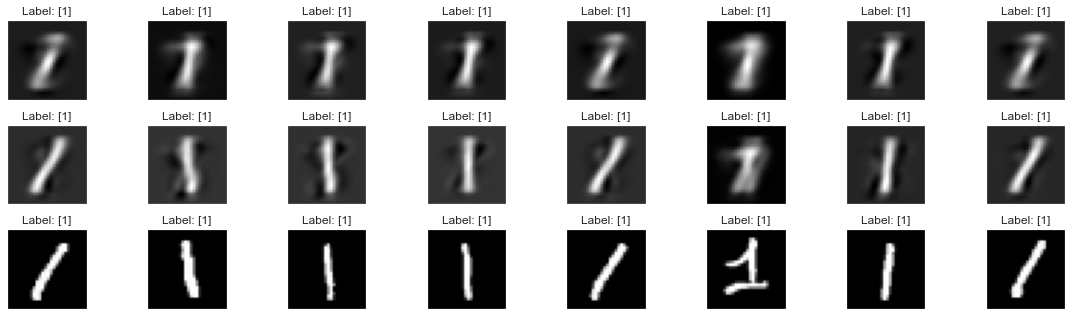

In [182]:
# We plot a random images in the dataset by using np.random.randint
num_row = 3 # number of rows used to plot the images 
num_col = 8 # plot images
print("the inverse transformation and the real images respectively : p = 2 p = 10 and real data")
fig, axes = plt.subplots(num_row, num_col, figsize=(2*num_col,1.5*num_row))
for i in range(8):
    ax = axes[0,i]
    ax.imshow(trans_inv_digits1[i].reshape((28,28)), cmap='gray')
    ax.set_title('Label: {}'.format(digits["y"][i]))
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.grid(False)
    
for i in range(8):
    ax = axes[1,i]
    ax.imshow(trans_inv_digits3[i].reshape((28,28)), cmap='gray')
    ax.set_title('Label: {}'.format(digits["y"][i]))
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.grid(False)

for i in range(8):
    ax = axes[2, i]
    ax.imshow(digits["x"][i].reshape((28,28)), cmap='gray')
    ax.set_title('Label: {}'.format(digits["y"][i]))
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.grid(False)
plt.tight_layout()
plt.show()


It seems that more p is bigger, more the transformation is clearer.

## 4.2 Manifold Learning : TSNE

In [184]:
# TSNE(2) for both datasets
tsne_temp = TSNE(2).fit_transform(temp["data"][:,:-2])
tsne_digits = TSNE(2).fit_transform(digits["x"])

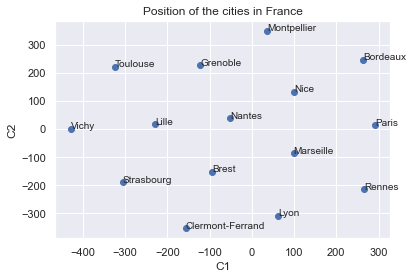

In [187]:
# The projection of the temp dataset on the dimensions
fig, ax = plt.subplots()
ax.scatter(tsne_temp[:,0], tsne_temp[:,1])
ax.title.set_text("Position of the cities in France")
ax.set_xlabel('C1')
ax.set_ylabel('C2')

for i, txt in enumerate(temp["villes"]):
    ax.annotate(txt, (tsne_temp[i,0], tsne_temp[i,1]))

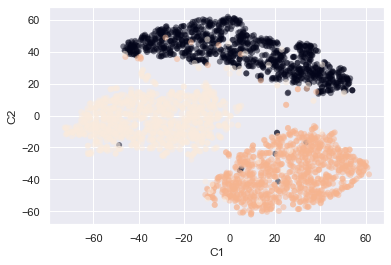

In [189]:
# The projection of the digits dataset on the two dimensions
plt.scatter(tsne_digits[:,0], tsne_digits[:,1], c = digits["y"],edgecolor='none', alpha=0.5)
plt.xlabel("C1")
plt.ylabel("C2")
plt.show()